# Problem 4.1

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [178]:
# LIBRARIES
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import*
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy import pprint

# SYMBOLS
f_1 = sp.Symbol('F_1')
f_2 = sp.Symbol('F_2')
f_3 = sp.Symbol('F_3')
r_1 = sp.Symbol('R_1')
r_2 = sp.Symbol('R_2')
r_3 = sp.Symbol('R_3')
e = sp.Symbol('E')
l = sp.Symbol('L')
a = sp.Symbol('A')
p = sp.Symbol('P')
d = sp.Symbol('d')

#### Writing the equillibrium equations

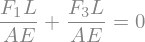

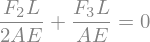

In [180]:
equation_1 = Eq(- r_1 + f_1,0)
equation_2 = Eq(- f_1 - f_2 + f_3 + p, 0)
equation_3 = Eq(- r_2 + f_2, 0)
equation_4 = Eq(- f_3 + r_3, 0)
equation_5 = Eq(f_1*l/(a*e) + f_3*l/(a*e), 0)
equation_6 = Eq(f_2*l/(2*a*e) + f_3*l/(a*e), 0)
display(equation_1, equation_2, equation_3, equation_4, equation_5, equation_6)

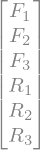

In [181]:
Matrix([[f_1], [f_2], [f_3], [r_1], [r_2], [r_3]])

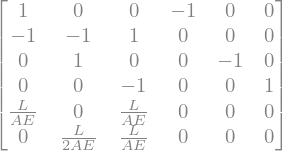

In [182]:
Matrix([[1,0,0,-1,0,0], 
        [-1,-1,1,0,0,0], 
        [0,1,0,0,-1,0], 
        [0,0,-1,0,0,1], 
        [l/(a*e),0,+l/(a*e),0,0,0], 
        [0,l/(2*e*a),+l/(e*a),0,0,0]])

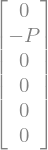

In [183]:
Matrix([[0],[-p],[0],[0],[0],[0]])

In [184]:
a_matrix = Matrix([[1,0,0,-1,0,0], 
        [-1,-1,1,0,0,0], 
        [0,1,0,0,-1,0], 
        [0,0,-1,0,0,1], 
        [l/(a*e),0,+l/(a*e),0,0,0], 
        [0,l/(2*e*a),+l/(e*a),0,0,0]])
b_matrix = Matrix([[0],[-p],[0],[0],[0],[0]])
f_matrix = Matrix([[f_1], [f_2], [f_3], [r_1], [r_2], [r_3]])

#### Forces in each member and reactions from the supports are defined by the column matrix below.

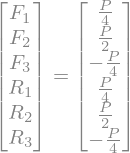

In [185]:
display((Eq(f_matrix, a_matrix.inv()*b_matrix)))

#### The displacement (d) of the connecting point is -  

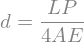

In [186]:
solution_matrix = a_matrix.inv()*b_matrix
display(Eq(d, a_matrix[4,0] * solution_matrix[0]))

# Problem 4.3

In [252]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [273]:
# LIBRARIES
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import*
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy import pprint

# SYMBOLS
f = sp.Symbol('F')
f_a = sp.Symbol('F_al')
f_s = sp.Symbol('F_st')
a_s = sp.Symbol('A_st')
a_a = sp.Symbol('A_al')
e_s = sp.Symbol('E_st')
e_a = sp.Symbol('E_al')
sigma_a = sp.Symbol('sigma_al^y')
sigma_s = sp.Symbol('sigma_st^y')
f_a_max = sp.Symbol('F_max^al')
f_s_max = sp.Symbol('F_max^st')
p = sp.Symbol('P')

#### Writing the equillibrium equation

In [254]:
equillibrium_equation = Eq(f, f_a + f_s)
display(equillibrium_equation)

#### Constitutive relation

In [255]:
constitutive_equation_1 = Eq(f_a, ((e_a*a_a) / (e_s*a_s)) * f_s)

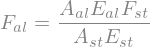

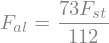

In [256]:
constitutive_equation_1_rhs = constitutive_equation_1.rhs.subs({a_a: 1500, e_a: 73*10**3, a_s: 800,e_s: 210*10**3})
display(constitutive_equation_1, Eq(f_a, constitutive_equation_1_rhs))

#### Using value of force in aluminum tube, in terms of force in steel bar, in equillibrium equation

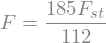

In [257]:
equillibrium_equation_using_f_a = Eq(f, equillibrium_equation.rhs.subs(f_a, constitutive_equation_1_rhs))
equillibrium_equation_terms_of_f_s = Eq(round((112/185),2) * f, 
                                        (112/185) * equillibrium_equation_using_f_a.rhs)
display(equillibrium_equation_using_f_a, equillibrium_equation_terms_of_f_s)

#### From the above equation it can be infered that the steel bar is taking up approximately 60% of the load.

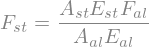

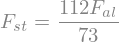

In [258]:
constitutive_equation_2 = Eq(f_s, ((e_s*a_s) / (e_a*a_a)) * f_a)
constitutive_equation_2_rhs = constitutive_equation_2.rhs.subs({a_a: 1500, e_a: 73*10**3, a_s: 800,e_s: 210*10**3})
display(constitutive_equation_2, Eq(f_s, constitutive_equation_2_rhs))

#### Using value of force in steel bar, in terms of force in aluminum tube, in equillibrium equation

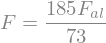

In [259]:
equillibrium_equation_using_f_s = Eq(f, equillibrium_equation.rhs.subs(f_s, constitutive_equation_2_rhs))
equillibrium_equation_terms_of_f_a = Eq(round((73/185),2) * f, 
                                        (73/185) * equillibrium_equation_using_f_s.rhs)
display(equillibrium_equation_using_f_s, equillibrium_equation_terms_of_f_a)

#### From the above equation it can be infered that the aluminum tube is taking up approximately 40% of the load. 

#### So, the magnitude of the maximum load that can be applied before the given assembly yields.

In [265]:
equation_yield_f_a = Eq(f_a, sigma_a*a_a)
equation_yield_f_a_magnitude = Eq(f_a, equation_yield_f_a.rhs.subs({a_a: 1500, sigma_a: 400}))
display(equation_yield_f_a, equation_yield_f_a_magnitude)

In [267]:
equation_yield_f_s = Eq(f_s, sigma_s*a_s)
equation_yield_f_s_magnitude = Eq(f_s, equation_yield_f_s.rhs.subs({a_s: 800, sigma_s: 600}))
display(equation_yield_f_s, equation_yield_f_s_magnitude)

In [283]:
f_a_max_load = Eq(f_a_max, equation_yield_f_a_magnitude.rhs/.4)
f_s_max_load = Eq(f_s_max, equation_yield_f_s_magnitude.rhs/.6)
display(f_a_max_load, f_s_max_load)

#### So, based on the above values 800 KN is the maximum value of the load that can be applied on the assembly, without prestress (P), before it yields.

#### Now, to calculate the optimal prestress (P) value, used to improve the system performance, the maximum failure load value will be used in the load equation for the steel bar along with the prestress P. 

In [288]:
load_equation_s = Eq(-p, (.6 * f_a_max_load.rhs - f_s))
load_equation_s_magnitude = load_equation_s.rhs.subs(f_s, equation_yield_f_s_magnitude.rhs)
display(load_equation_s, Eq(p, -load_equation_s_magnitude))

#### The % improvement in the given assembly after the prestress P is

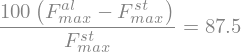

In [292]:
percent_improvement = Eq(((f_a_max - f_s_max)/f_s_max)*100, ((f_a_max_load.rhs - f_s_max_load.rhs)/f_s_max_load.rhs)*100)
display(percent_improvement)

# Problem 4.7

In [520]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [521]:
# LIBRARIES
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import*
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy import pprint

# SYMBOLS
f_a = sp.Symbol('F_al')
e_a = sp.Symbol('E_al')
sigma_a = sp.Symbol('sigma_a')
l = sp.Symbol('L')
alpha_a = sp.Symbol('alpha_a')
t = sp.Symbol('T')
epsilon_t = sp.Symbol('epsilon_t')

#### Compressive thermal stress due to the rise in termperatuere

In [538]:
thermal_strain = Eq(epsilon_t, alpha_a*t)
thermal_stress = Eq(sigma_a, -epsilon_t*e_a)
thermal_stress_equation = thermal_stress.subs(epsilon_t, thermal_strain.rhs)
thermal_stress_magnitude = thermal_stress_equation.subs({e_a: 73e9,
                             t: 120, 
                             alpha_a: 16.5e-6})
thermal_stress_magnitude = Eq(sigma_a, thermal_stress_magnitude.rhs/1e6)
display(thermal_strain, thermal_stress, thermal_stress_equation, thermal_stress_magnitude)

# Problem 4.8

In [366]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [367]:
# LIBRARIES
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import*
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy import pprint

# SYMBOLS
f_c = sp.Symbol('F_c')
f_s = sp.Symbol('F_st')
a_s = sp.Symbol('A_st')
a_c = sp.Symbol('A_c')
e_s = sp.Symbol('E_st')
e_c = sp.Symbol('E_c')
sigma_s = sp.Symbol('sigma_st')
sigma_c = sp.Symbol('sigma_c')
d_f_c = sp.Symbol('d_f^c')
d_f_s = sp.Symbol('d_f^st')
d_t_s = sp.Symbol('d_t^st')
d_t_c = sp.Symbol('d_t^c')
l = sp.Symbol('L')
alpha_c = sp.Symbol('alpha_c')
alpha_s = sp.Symbol('alpha_st')
t = sp.Symbol('T')

#### Writing the equillibrium equation

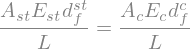

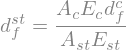

In [388]:
force_equillibrium_equation = Eq(f_s, f_c)
force_displacement_equation = Eq(force_equillibrium_equation.lhs.subs(f_s, d_f_s*(a_s*e_s)/l),
                                force_equillibrium_equation.rhs.subs(f_c, d_f_c*(a_c*e_c)/l))
d_f_s_equation = solve(force_displacement_equation, d_f_s)
d_f_s_equation = Eq(d_f_s, d_f_s_equation[0])
display(force_equillibrium_equation, force_displacement_equation, d_f_s_equation)

#### Constitutive relation

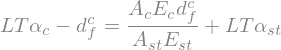

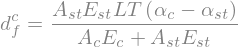

In [389]:
constitutive_relation_equation = Eq(d_t_c - d_f_c, d_t_s + d_f_s)
constitutive_relation_equation_thermal_subs = constitutive_relation_equation.subs({d_t_c: alpha_c*t*l, 
                                                                                   d_t_s: alpha_s*t*l,
                                                                                   d_f_s: d_f_s_equation.rhs})
d_f_c_equation = solve(constitutive_relation_equation_thermal_subs, d_f_c)
d_f_c_equation = Eq(d_f_c, d_f_c_equation[0])
display(constitutive_relation_equation, 
        constitutive_relation_equation_thermal_subs,
        d_f_c_equation)

In [395]:
d_f_c_magnitude = Eq(d_f_c, d_f_c_equation.rhs.subs({a_s: 750e-6,
                         e_s: 210e9,
                         l: .5,
                         t: 60,
                         e_c: 120e9,
                         alpha_c: 17e-6,
                         alpha_s: 12e-6,
                         a_c: 1250e-6
                    }))
d_f_s_magnitude = Eq(d_f_s, d_f_s_equation.rhs.subs({a_s: 750e-6,
                         e_s: 210e9,
                         e_c: 120e9,
                         a_c: 1250e-6,
                        d_f_c: d_f_c_magnitude.rhs
                    }))
display(d_f_c_magnitude, d_f_s_magnitude)

#### So, from the above displacements the strains and then the corresponding stresses induced in the copper tube and steel bar can be obtained.

In [402]:
stress_copper_tube = Eq(sigma_c, ((d_f_c_magnitude.rhs/.5)*120e9)/1e6)
stress_steel_bar = Eq(sigma_s, ((d_f_s_magnitude.rhs/.5)*210e9)/1e6)
display(stress_copper_tube, stress_steel_bar)

# Problem 5.1 - a

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
# LIBRARIES
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import*
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy import pprint

# SYMBOLS FOR EXPRESSION
x_1 = sp.Symbol('x_1')
a = sp.Symbol('a')
L = sp.Symbol('L')
E = sp.Symbol('E')
p_0 = sp.Symbol('p_0')
f = sp.Function('u_2')(x_1)
fM = sp.Function('M_3')(x_1)
fV = sp.Function('V_2')(x_1)

H33_c = (E*a**4) * (1 - (x_1/(2*L)))**3
# MOMENT EQUATION AS GOVERNING EQUATION.
differential_equation = H33_c * f.diff(x_1, 2) - p_0*x_1*L/3

#### To generate the elastic curve, values for the following parameters are fixed (all the dimensions are in mm) - 
- length = 5000
- area of cross-section - 30 x 30
- modulus of elasticity - 210000
- force is set to 10 KN

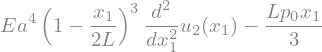

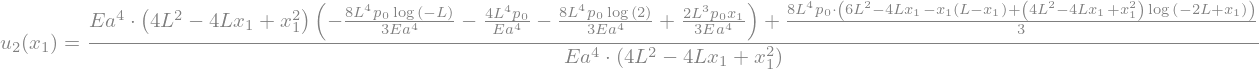

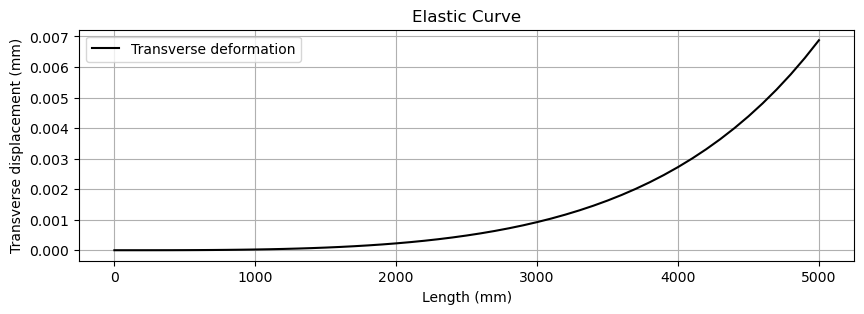

In [13]:
# BOUNDARY CONDITIONS
b_condition = {f.diff(x_1, 1).subs(x_1, 0): 0, f.subs(x_1, 0): 0}
solution_general_form = dsolve(differential_equation, ics=b_condition)
solution = solution_general_form.subs({L: 5000, a: 30*30, E: 210 * 10**3, p_0: 10*10**3})
solution = solution.rhs

x_axis_val = []
y_axis_val = []

refinement = 50
for i in range(0,int(refinement+1),1):
    y_val = (5000/refinement)*i
    y_val = solution.subs(x_1, y_val)
    y_val = complex(y_val)
    y_axis_val.append((y_val.real)/1000)
    
    x_val = (5000/refinement)*i
    x_axis_val.append(x_val)


# FUNCTIONS FOR DISPLAYING EQUATIONS
def display_differential_equation_and_solution():
    display(differential_equation, solution_general_form)     
    
display_differential_equation_and_solution()

plt.figure(figsize=(10, 3))
plt.plot(x_axis_val, y_axis_val, color='black')
plt.xlabel('Length (mm)')
plt.ylabel('Transverse displacement (mm)')
plt.title('Elastic Curve')
plt.legend(['Transverse deformation'])
plt.grid()
plt.show()

#### Bending moment distribution in the beam

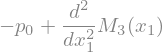

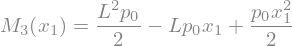

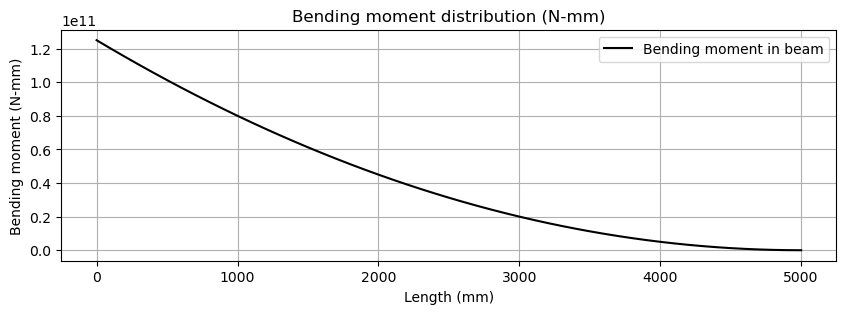

In [11]:
moment_differential_equation = fM.diff(x_1, 2) - p_0
b_condition_moment_differential_equation = {fM.diff(x_1, 1).subs(x_1, L): 0, fM.subs(x_1, L): 0}
solution_moment_differential_equation_general_form = dsolve(moment_differential_equation, 
                                                            ics=b_condition_moment_differential_equation)
solution_moment_differential_equation = solution_moment_differential_equation_general_form.subs({L: 5000, p_0: 10 * 10**3})
solution_moment_differential_equation = solution_moment_differential_equation.rhs

x_axis_val_moment = []
y_axis_val_moment = []

refinement = 50
for i in range(0,int(refinement+1),1):
    y_val = (5000/refinement)*i
    y_val = solution_moment_differential_equation.subs(x_1, y_val)
    y_axis_val_moment.append(y_val)
    
    x_val = (5000/refinement)*i
    x_axis_val_moment.append(x_val)

    
display(moment_differential_equation, solution_moment_differential_equation_general_form)    

plt.figure(figsize=(10, 3))
plt.plot(x_axis_val_moment, y_axis_val_moment, color='black')
plt.xlabel('Length (mm)')
plt.ylabel('Bending moment (N-mm)')
plt.title('Bending moment distribution (N-mm)')
plt.legend(['Bending moment in beam'])
plt.grid()
plt.show()

#### Maximum bending moment value

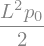

In [12]:
solution_moment_differential_equation_general_form = solution_moment_differential_equation_general_form.rhs
maximum_bending_moment_value = solution_moment_differential_equation_general_form.subs(x_1, 0)
display(maximum_bending_moment_value)

# Problem 5.1 - b

In [488]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [504]:
# LIBRARIES
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import*
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy import pprint

# SYMBOLS FOR EXPRESSION
x_1 = sp.Symbol('x_1')
a = sp.Symbol('a')
L = sp.Symbol('L')
E = sp.Symbol('E')
p_0 = sp.Symbol('p_0')
f = sp.Function('u_2')(x_1)
fM = sp.Function('M_3')(x_1)
fV = sp.Function('V_2')(x_1)

H33_c = (E*a**4)/12
# MOMENT EQUATION AS GOVERNING EQUATION.
differential_equation = H33_c * f.diff(x_1, 2) - p_0*x_1

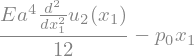

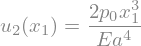

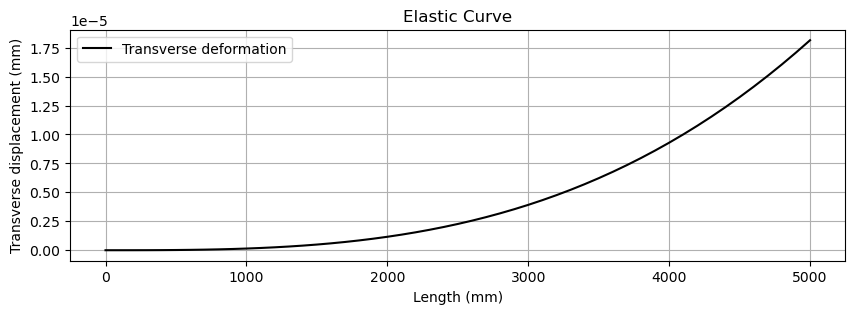

In [505]:
# BOUNDARY CONDITIONS
b_condition = {f.diff(x_1, 1).subs(x_1, 0): 0, f.subs(x_1, 0): 0}
solution_general_form = dsolve(differential_equation, ics=b_condition)
solution = solution_general_form.subs({L: 5000, a: 30*30, E: 210 * 10**3, p_0: 10*10**3})
solution = solution.rhs

x_axis_val = []
y_axis_val = []

refinement = 50
for i in range(0,int(refinement+1),1):
    y_val = (5000/refinement)*i
    y_val = solution.subs(x_1, y_val)
    y_val = complex(y_val)
    y_axis_val.append((y_val.real)/1000)
    
    x_val = (5000/refinement)*i
    x_axis_val.append(x_val)

# FUNCTIONS FOR DISPLAYING EQUATIONS
def display_differential_equation_and_solution():
    display(differential_equation, solution_general_form)     
    
display_differential_equation_and_solution()

plt.figure(figsize=(10, 3))
plt.plot(x_axis_val, y_axis_val, color='black')
plt.xlabel('Length (mm)')
plt.ylabel('Transverse displacement (mm)')
plt.title('Elastic Curve')
plt.legend(['Transverse deformation'])
plt.grid()
plt.show()

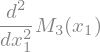

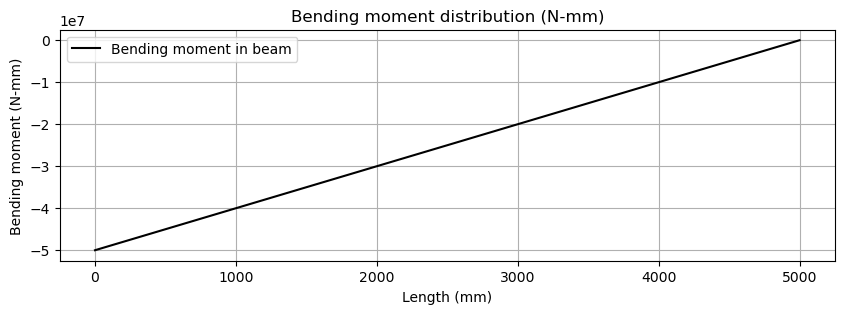

In [512]:
moment_differential_equation = fM.diff(x_1, 2)
b_condition_moment_differential_equation = {fM.diff(x_1, 1).subs(x_1, L): p_0, fM.subs(x_1, L): 0}
solution_moment_differential_equation_general_form = dsolve(moment_differential_equation, 
                                                            ics=b_condition_moment_differential_equation)
solution_moment_differential_equation = solution_moment_differential_equation_general_form.subs({L: 5000, p_0: 10 * 10**3})
solution_moment_differential_equation = solution_moment_differential_equation.rhs

x_axis_val_moment = []
y_axis_val_moment = []

refinement = 50
for i in range(0,int(refinement+1),1):
    y_val = (5000/refinement)*i
    y_val = solution_moment_differential_equation.subs(x_1, y_val)
    y_axis_val_moment.append(y_val)
    
    x_val = (5000/refinement)*i
    x_axis_val_moment.append(x_val)

    
display(moment_differential_equation, solution_moment_differential_equation_general_form)    

plt.figure(figsize=(10, 3))
plt.plot(x_axis_val_moment, y_axis_val_moment, color='black')
plt.xlabel('Length (mm)')
plt.ylabel('Bending moment (N-mm)')
plt.title('Bending moment distribution (N-mm)')
plt.legend(['Bending moment in beam'])
plt.grid()
plt.show()

#### The value of maximum bending moment is

In [513]:
solution_moment_differential_equation_general_form = solution_moment_differential_equation_general_form.rhs
maximum_bending_moment_value = solution_moment_differential_equation_general_form.subs(x_1, 0)
display(maximum_bending_moment_value)

# Problem 5.2

In [444]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [445]:
# LIBRARIES
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import*
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy import pprint

# SYMBOLS FOR EXPRESSION
x_1 = sp.Symbol('x_1')
a = sp.Symbol('A')
L = sp.Symbol('L')
E = sp.Symbol('E')
p_0 = sp.Symbol('p_0')
p_1 = sp.Symbol('P_1')
u_1 = sp.Function('u_1')(x_1)
n_1 = sp.Function('N_1')(x_1)

S33_c = E*a
# MOMENT EQUATION AS GOVERNING EQUATION.
differential_equation = Eq(S33_c * u_1.diff(x_1, 2) + p_0*x_1, 0)

In [446]:
b_condition = {u_1.diff(x_1, 1).subs(x_1, L): p_1/S33_c, u_1.subs(x_1, 0): 0}
solution_general_form = dsolve(differential_equation, ics=b_condition)

#### To generate the axial displacement distribution curve, values for the following parameters are fixed (all the dimensions are in mm) - 
- length = 5000
- area of cross-section - 30 x 30
- modulus of elasticity - 210000
- force on the domain and at the boundary is set to 100N

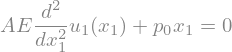

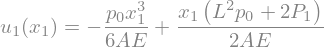

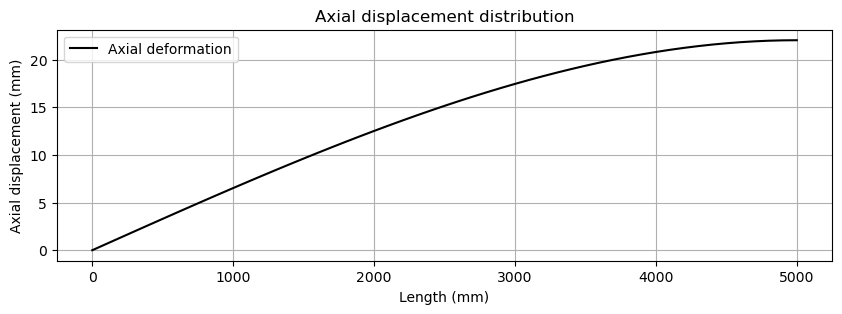

In [486]:
solution = solution_general_form.subs({L: 5000, a: 30*30, E: 210 * 10**3, p_0: 100, p_1: 100})
solution = solution.rhs

x_axis_val = []
y_axis_val = []

refinement = 50
for i in range(0,int(refinement+1),1):
    y_val = (5000/refinement)*i
    y_val = solution.subs(x_1, y_val)
    y_axis_val.append(y_val/1000)
    
    x_val = (5000/refinement)*i
    x_axis_val.append(x_val)
    

display(differential_equation, solution_general_form)

plt.figure(figsize=(10, 3))
plt.plot(x_axis_val, y_axis_val, color='black')
plt.xlabel('Length (mm)')
plt.ylabel('Axial displacement (mm)')
plt.title('Axial displacement distribution')
plt.legend(['Axial deformation'])
plt.grid()
plt.show()

#### So, for the stress resultant distribution N(x1) along the beam.

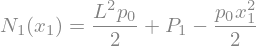

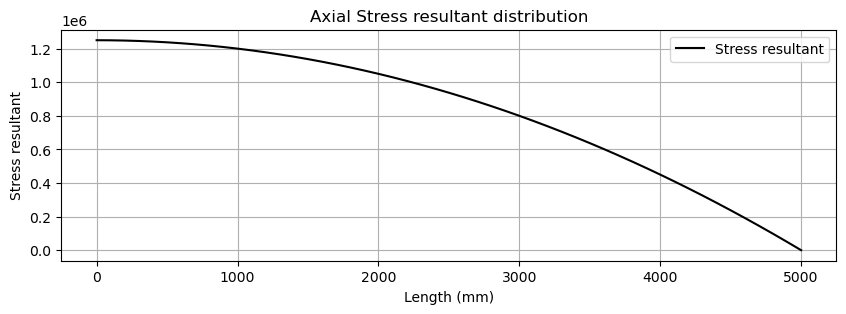

In [487]:
stress_resultant_N = S33_c * solution_general_form.rhs.diff(x_1, 1)
stress_resultant_N_equation = Eq(n_1, stress_resultant_N)
stress_resultant_N_equation_plot = stress_resultant_N_equation.subs({L: 5000, a: 30*30, E: 210 * 10**3, p_0: 100, p_1: 100})

x_axis_val = []
y_axis_val = []

refinement = 50
for i in range(0,int(refinement+1),1):
    y_val = (5000/refinement)*i
    y_val = stress_resultant_N_equation_plot.rhs.subs(x_1, y_val)
    y_axis_val.append(y_val/1000)
    x_val = (5000/refinement)*i
    x_axis_val.append(x_val)

display(simplify(stress_resultant_N_general_form), stress_resultant_N_equation_plot)

plt.figure(figsize=(10, 3))
plt.plot(x_axis_val, y_axis_val, color='black')
plt.xlabel('Length (mm)')
plt.ylabel('Stress resultant')
plt.title('Axial Stress resultant distribution')
plt.legend(['Stress resultant'])
plt.grid()
plt.show()